## class CsvConverter

In [19]:
import json
import linecache as lc
import yaml
import pandas as pd

Again, it would have been better if you didn't use Notebook for this exercise.

In [18]:
with open('../config.yaml','r') as stream:
    config = yaml.safe_load(stream)
# Good to have these things in a config-file
file_path = config['dsst']

In [3]:
class CsvConverter:
    def __init__(self,file_name, header):
        self.file_name = file_name
        # Wouldn't it be more logical to make this class itself responsible 
        # for getting the headers?
        self.header = header
        self.keys = self.header.split(',')

    
    def convert_csv_to_json(self,lines):
        """
        Convert CSV lines to a JSON string.
        Args:
            lines (list): List of CSV lines.
        Returns:
            str: JSON string representing the converted data.
        """
        json_list=[]
        for line in lines:
            try:
                assert len(line) == len(self.keys)

                json_dict = {key: value for key, value in zip(self.keys, line)}
                json_list.append(json_dict)
            except AssertionError:
                print ("Number of items in line does not match the number of keys in header.")
            
        return json.dumps(json_list)
        

In [4]:
# header = 'first,second,third'
# c = CsvConverter(file_path,header)
# lines =[[1,2,3],[4,5,6]]
# c.convert_csv_to_json(lines)

## class Reader:

In [5]:
class Reader:
    # Good to inject the csvconverter in the initializer (DI)
    def __init__(self, location, csvconverter, period): # here you seperate the params with a comma *and* a space - inconsequent
        self.location = location # location of the dataset
        self.csvconverter = csvconverter
        self.starter = 2 # jump 2 lines because there are not required # be consequent in your spacing
        self.period = period #To set the number of rows to read!
        
    def get_lines(self):
        """
        Read lines from the CSV file.
        Returns:
            str: JSON string representing the converted data.
        """
        lines_list = list()
        for i in range(self.starter, self.starter + self.period):
            line = lc.getline(self.csvconverter.file_name,i).strip()
            if line:
                lines_list.append(line.split(','))
            else:
                break
        self.starter = self.starter + self.period
        if not lines_list:
            return ""
        
        return (self.csvconverter.convert_csv_to_json(lines_list))

In [22]:
# header = lc.getline(file_path,1).strip()
# r = Reader(file_path, CsvConverter(file_path,header),4)

In [24]:
# r.get_lines()

In [25]:
# r.starter

In [9]:
# r.get_lines()

In [10]:
# r.starter

## class AverageYear

In [103]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
class AverageYear:
    def __init__(self, reader):
        self.reader = reader
        self.average_year = None
        self.data_json = self.reader.get_lines()
        
    def calculate_average(self):
        """
        Calculate the average yearly temperature anomaly.
        Returns:
            float: Average yearly temperature anomaly.
        """
        if self.data_json:
            data = pd.read_json(self.data_json)
            self.average_year = data.mean()['J-D']
            return self.average_year
        else:
            return None
        
    def plot_average(self):
        """
        Plot the average yearly temperature anomaly.
        """
        if self.average_year is not None:
            if self.data_json:
                data = pd.read_json(self.data_json)
                years = data['Year']
                temperatures = data['J-D']

                plt.plot(years, temperatures)
                plt.xlabel('Year')
                plt.ylabel('Temperature Anomaly')
                plt.title('Average Yearly Temperature Anomaly')
                plt.axhline(self.average_year, color='red', linestyle='--', label='Average')
                plt.legend()
                plt.show()
            else:
                print("No data available.")
        else:
            print("Average not calculated.")

In [28]:
header = lc.getline(file_path,1).strip()
r = Reader(file_path, CsvConverter(file_path,header),10)
year_class = AverageYear(r)

In [106]:
year_avg = year_class.calculate_average()
year_avg

-0.223

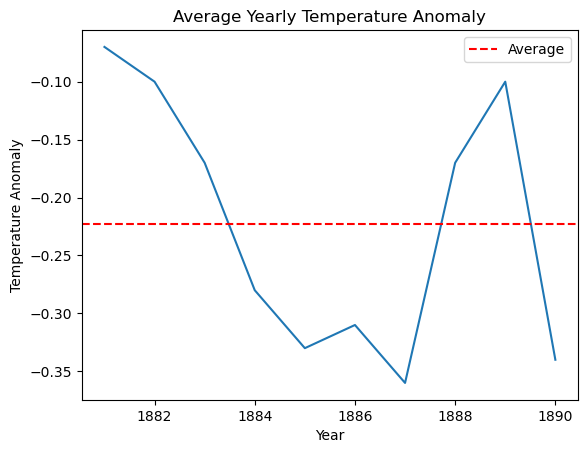

In [107]:
year_class.plot_average()

## class AverageMonth

In [146]:
import pandas as pd
import matplotlib.pyplot as plt

class AverageMonth:
    def __init__(self, reader):
        self.reader = reader
        self.average_month = None
        self.data_json = self.reader.get_lines()

    def calculate_average(self):
        """
        Calculate the average monthly temperature anomaly.
        Returns:
            pandas.Series: Average monthly temperature anomaly.
        """
        if self.data_json:
            data = pd.read_json(self.data_json)
            print('The head of data are: ')
            print(data.head)
            # Get the relevant columns for monthly temperature (e.g., Jan, Feb, Mar, ...)
            monthly_data = data.iloc[:, 1:13]  # the month columns are in positions 1 to 12
#             print(monthly_data)
            self.average_month = monthly_data.mean()
            print('monthly average of the fgiven data are: ')
            return self.average_month
        else:
            return None

    def plot_average(self):
        """
        Plot the average monthly temperature anomaly.
        """
        if self.average_month is not None:
            if self.data_json:
                data = pd.read_json(self.data_json)
                years = data['Year']
                months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
                temperatures = self.average_month.values

                plt.plot(months, temperatures)
                plt.xlabel('Month')
                plt.ylabel('Temperature Anomaly')
                first_year = years.iloc[0]
                last_year = years.iloc[-1]
                title = f'Average Monthly Temperature Anomaly from year {first_year} to year {last_year}'
                plt.title(title)
                plt.show()
            else:
                print("No data available.")
        else:
            print("Average not calculated.")

In [147]:
header = lc.getline(file_path,1).strip()
r = Reader(file_path, CsvConverter(file_path,header),10)
monthly_class = AverageMonth(r)
month_avg = monthly_class.calculate_average()
month_avg

The head of data are: 
<bound method NDFrame.head of    Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov  \
0  1881 -0.18 -0.13  0.04  0.06  0.07 -0.17  0.02 -0.02 -0.14 -0.21 -0.17   
1  1882  0.17  0.15  0.05 -0.16 -0.13 -0.22 -0.15 -0.06 -0.13 -0.23 -0.15   
2  1883 -0.28 -0.36 -0.12 -0.18 -0.17 -0.06 -0.06 -0.13 -0.21 -0.11 -0.23   
3  1884 -0.12 -0.07 -0.36 -0.39 -0.33 -0.34 -0.32 -0.27 -0.26 -0.24 -0.33   
4  1885 -0.58 -0.33 -0.26 -0.41 -0.45 -0.43 -0.33 -0.31 -0.28 -0.23 -0.23   
5  1886 -0.43 -0.50 -0.43 -0.28 -0.24 -0.34 -0.18 -0.30 -0.23 -0.27 -0.27   
6  1887 -0.71 -0.56 -0.35 -0.34 -0.30 -0.24 -0.25 -0.35 -0.25 -0.35 -0.26   
7  1888 -0.33 -0.35 -0.41 -0.20 -0.21 -0.17 -0.10 -0.15 -0.11  0.02  0.03   
8  1889 -0.08  0.17  0.07  0.10  0.00 -0.09 -0.07 -0.20 -0.23 -0.25 -0.33   
9  1890 -0.41 -0.44 -0.39 -0.29 -0.38 -0.24 -0.27 -0.38 -0.36 -0.24 -0.43   

    Dec   J-D   D-N   DJF   MAM   JJA   SON  
0 -0.06 -0.07 -0.08 -0.16  0.06 -0.06 -0.17  
1 -0.36

Jan   -0.295
Feb   -0.242
Mar   -0.216
Apr   -0.209
May   -0.214
Jun   -0.230
Jul   -0.171
Aug   -0.217
Sep   -0.220
Oct   -0.211
Nov   -0.237
Dec   -0.211
dtype: float64

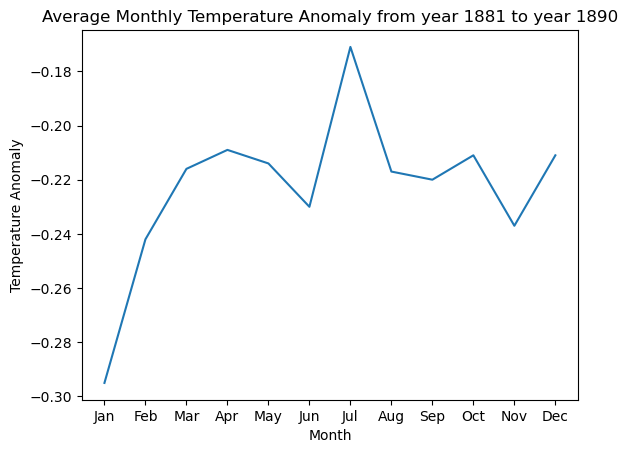

In [148]:
monthly_class.plot_average()

## Update Reader By observer

In [166]:
import time

class Reader:
    def __init__(self, location, csvconverter, period):
        self.location = location
        self.csvconverter = csvconverter
        self.starter = 2
        self.period = period
        self.observers = set()
        self.is_reading = False
        
    def get_lines(self):
        """
        Read lines from the CSV file.
        Returns:
            str: JSON string representing the converted data.
        """
        lines_list = list()
        for i in range(self.starter, self.starter + self.period):
            line = lc.getline(self.csvconverter.file_name, i).strip()
            if line:
                lines_list.append(line.split(','))
            else:
                break
        self.starter = self.starter + self.period
        if not lines_list:
            return ""

        return self.csvconverter.convert_csv_to_json(lines_list)

    def add_observer(self, observer):
        """
        Add an observer to the Reader's list of observers.
        Args:
            observer: Observer instance to be added.
        """
        self.observers.add(observer)

    def remove_observer(self, observer):
        """
        Remove an observer from the Reader's list of observers if present.
        Args:
            observer: Observer instance to be removed.
        """
        self.observers.discard(observer)

    def notify_observers(self):
        """
        Notify all registered observers by calling their update() method.
        """
        for observer in self.observers:
            observer.update()

    def start_reading(self):
        """
        Start reading the CSV file, periodically notifying the observers.
        The method reads a chunk of lines from the CSV file, converts them to JSON,
        and notifies the observers. It repeats this process until all lines have been read.
        The method waits for 5 seconds between iterations.
        """
        self.is_reading = True
        while self.is_reading:
            # Now you're returning data from this internal method; if you are working with
            # an observable, it makes more sense to store this data as a state of the oject,
            # and to notify the observers whenever that state changes.
            # Also, I think you are blocking the main thread in this architecture: the 
            # propagation (changing of the state of) of the observable should be the responsibility
            # of whoever is using this class (the client).
            
            self.data_json = self.get_lines()
            self.notify_observers()
            if not self.data_json:
                self.is_reading = False
            time.sleep(5)


## Update AverageYear and AverageMonth

In [167]:
## The classes are like the previous section.We just add another class of observers
class AverageYear:
    def __init__(self, reader):
        self.reader = reader
        self.average_year = None

    def calculate_average(self):
        if self.reader.data_json:
            data = pd.read_json(self.reader.data_json)
            self.average_year = data.mean()['J-D']
            return self.average_year
        else:
            return None

    def plot_average(self):
        if self.average_year is not None:
            if self.reader.data_json:
                data = pd.read_json(self.reader.data_json)
                years = data['Year']
                temperatures = data['J-D']

                plt.plot(years, temperatures)
                plt.xlabel('Year')
                plt.ylabel('Temperature Anomaly')
                plt.title('Average Yearly Temperature Anomaly')
                plt.axhline(self.average_year, color='red', linestyle='--', label='Average')
                plt.legend()
                plt.show()
            else:
                print("No data available.")
        else:
            print("Average not calculated.")

class AverageMonth:
    def __init__(self, reader):
        self.reader = reader
        self.average_month = None

    def calculate_average(self):
        if self.reader.data_json:
            data = pd.read_json(self.reader.data_json)
            monthly_data = data.iloc[:, 1:13]
            self.average_month = monthly_data.mean()
            return self.average_month
        else:
            return None

    def plot_average(self):
        if self.average_month is not None:
            if self.reader.data_json:
                data = pd.read_json(self.reader.data_json)
                years = data['Year']
                months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
                temperatures = self.average_month.values

                plt.plot(months, temperatures)
                plt.xlabel('Month')
                plt.ylabel('Temperature Anomaly')
                first_year = years.iloc[0]
                last_year = years.iloc[-1]
                title = f'Average Monthly Temperature Anomaly from year {first_year} to year {last_year}'
                plt.title(title)
                plt.show()
            else:
                print("No data available.")
        else:
            print("Average not calculated.")


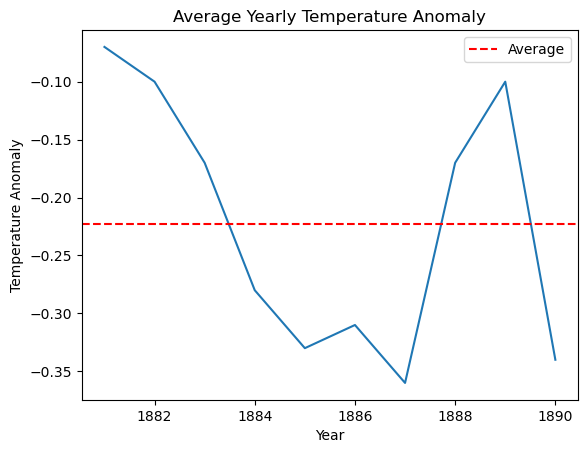

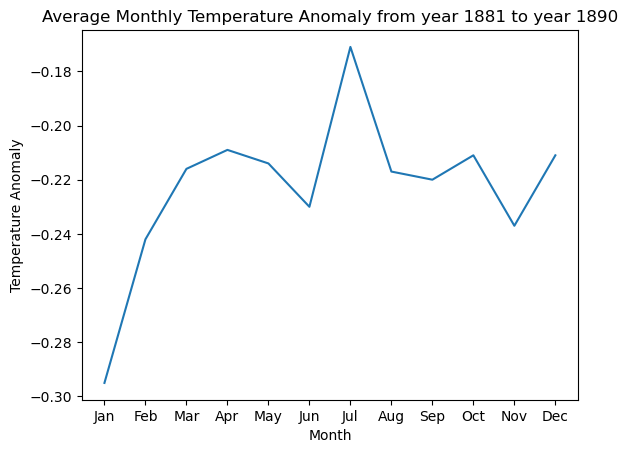

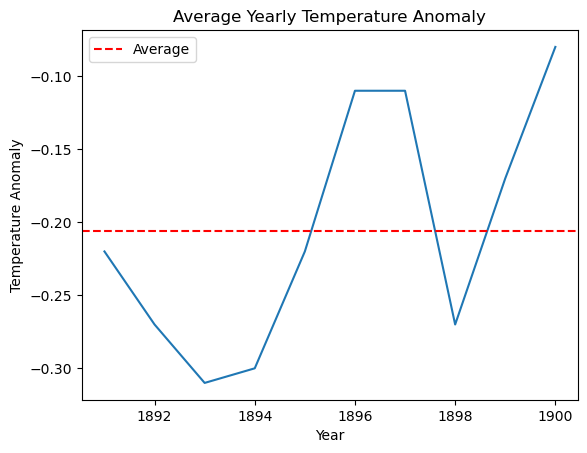

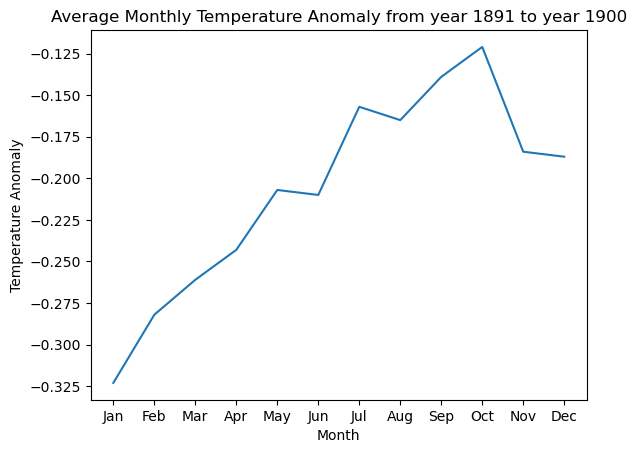

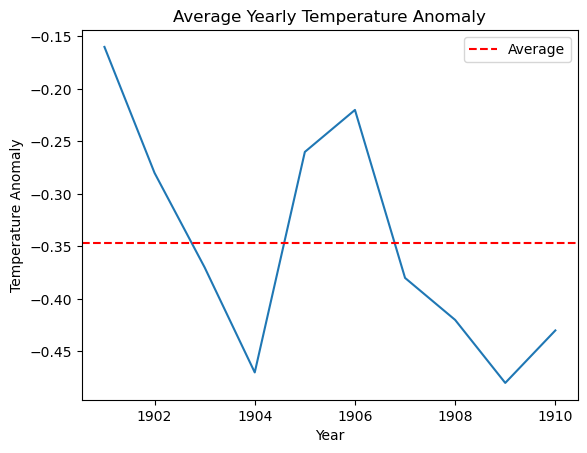

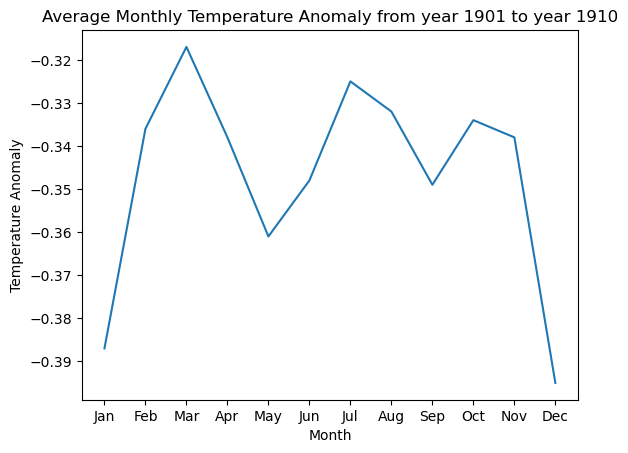

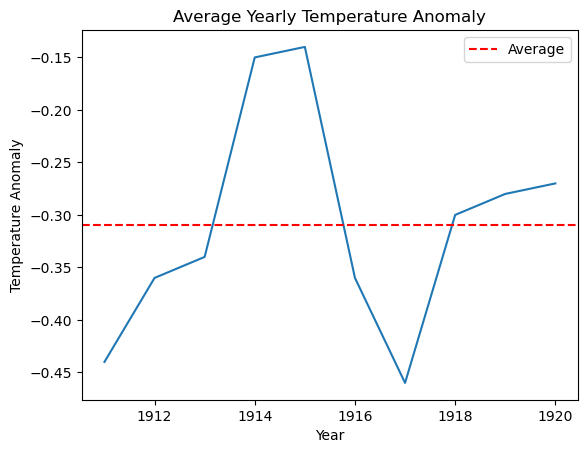

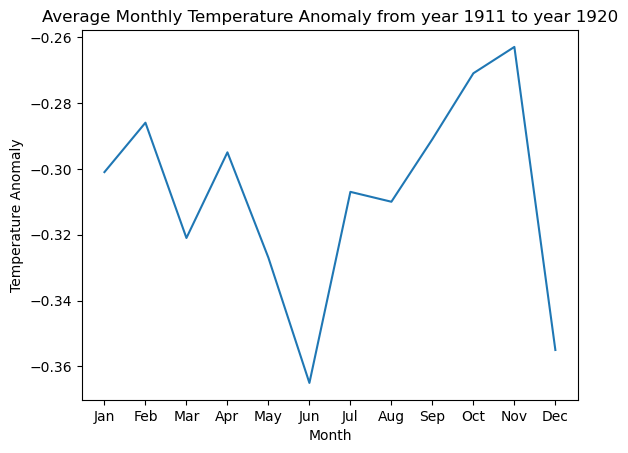

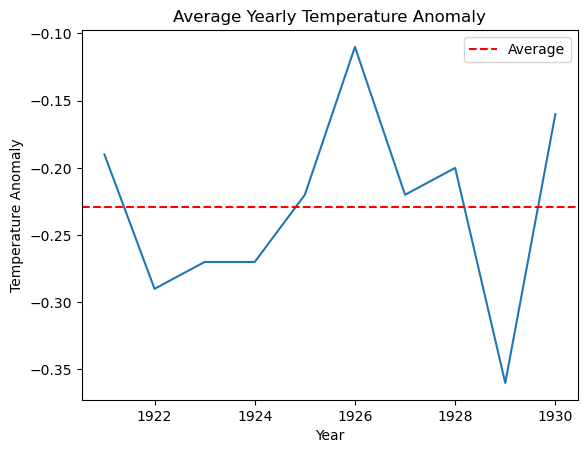

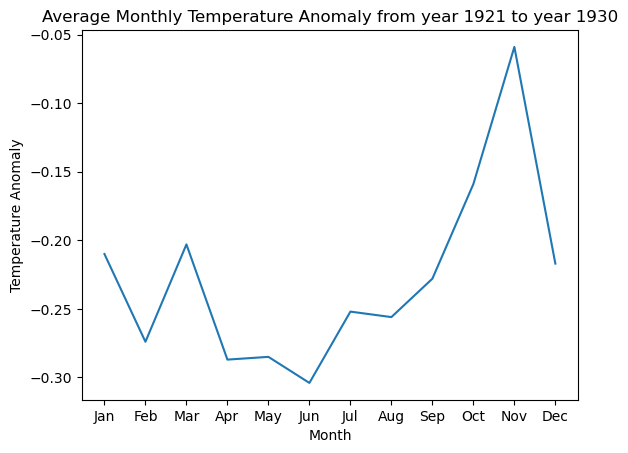

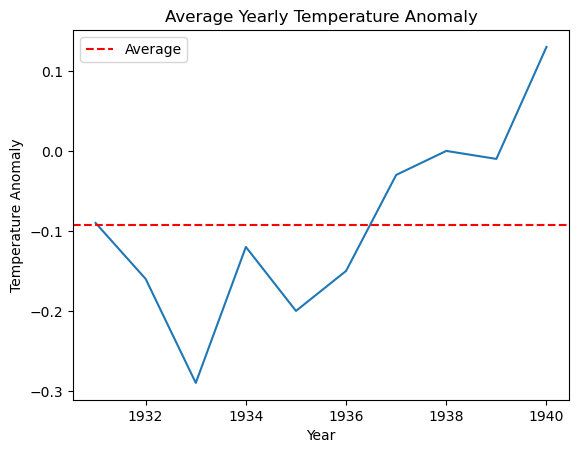

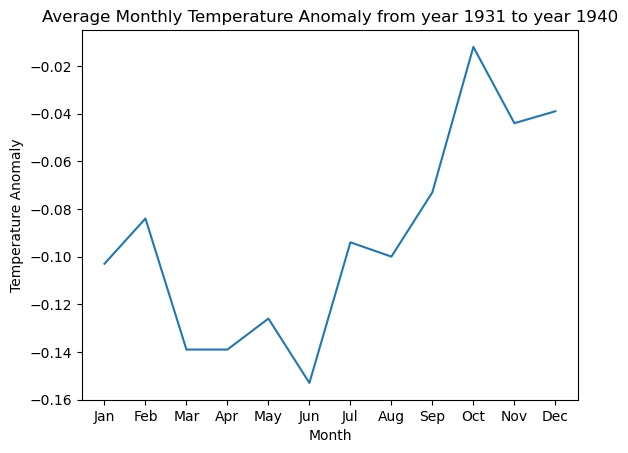

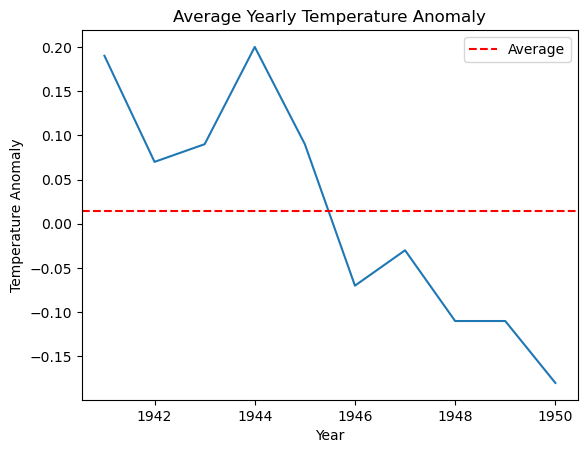

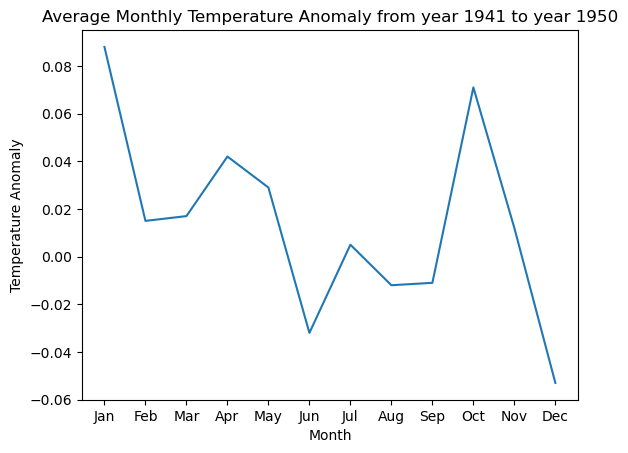

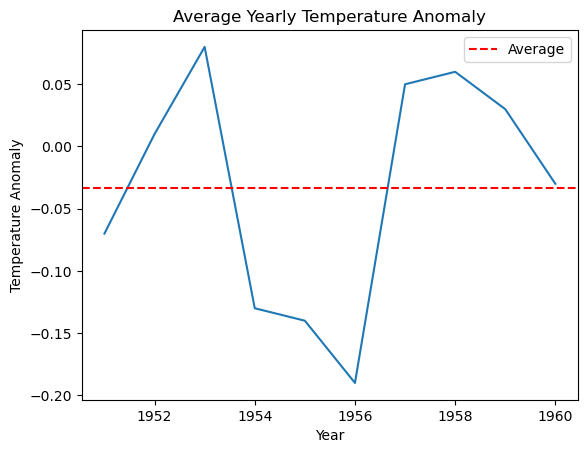

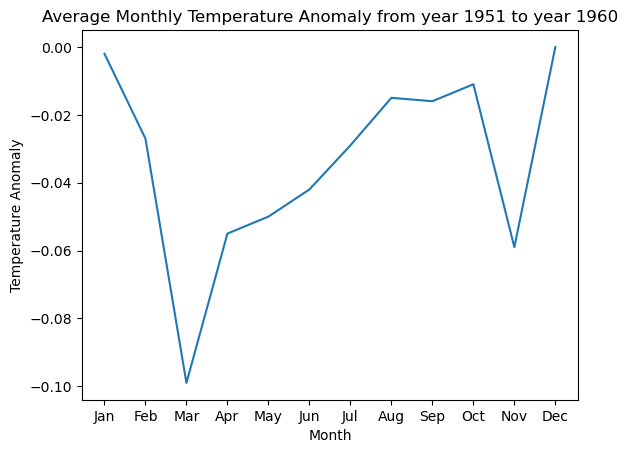

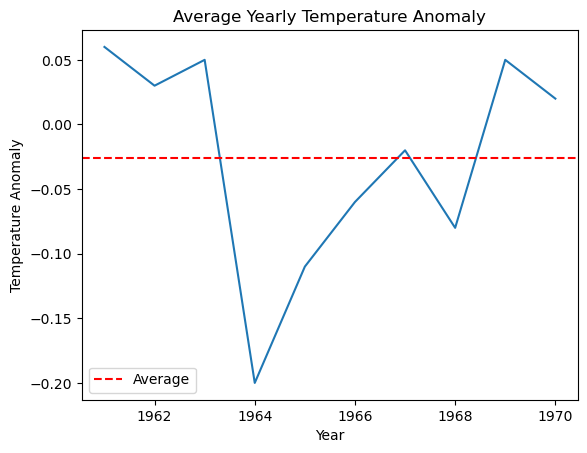

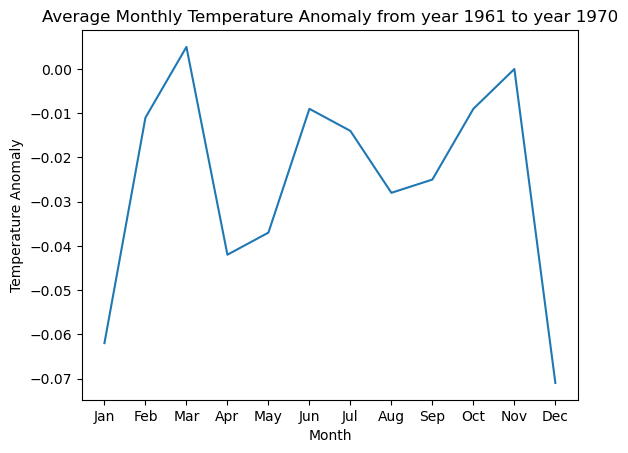

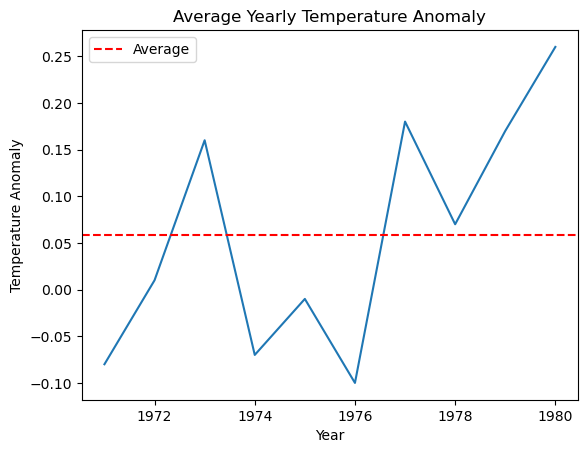

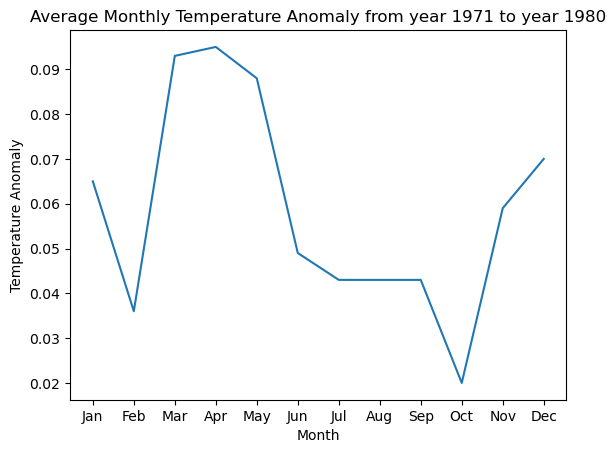

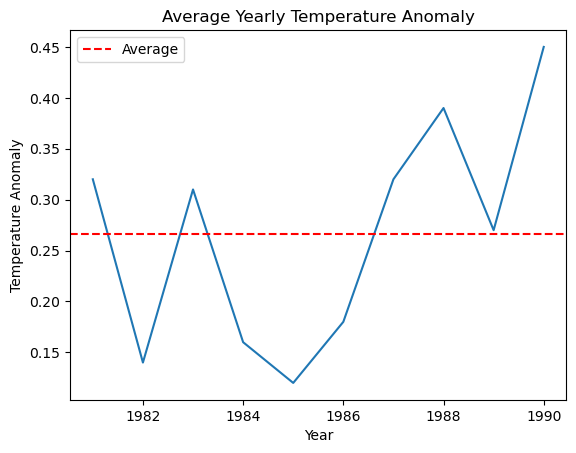

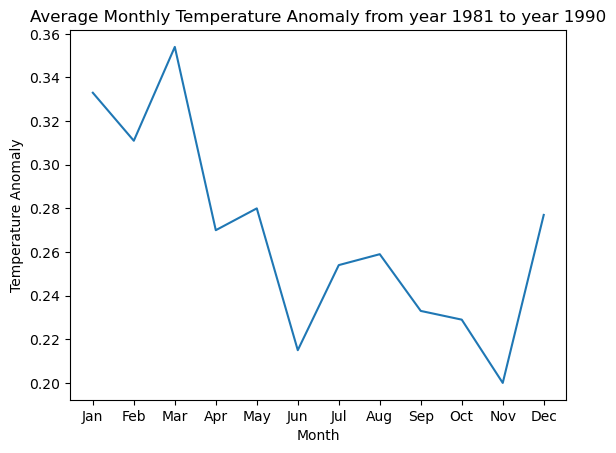

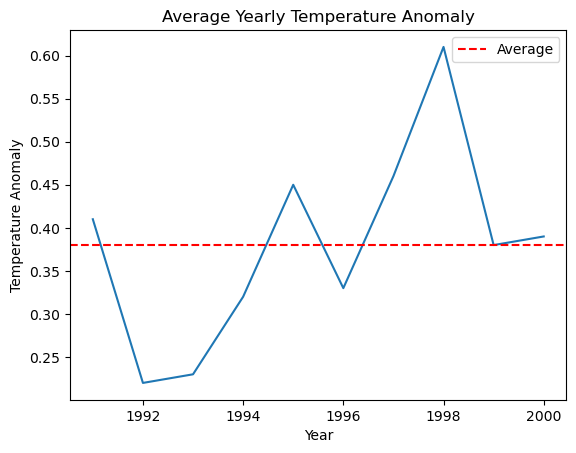

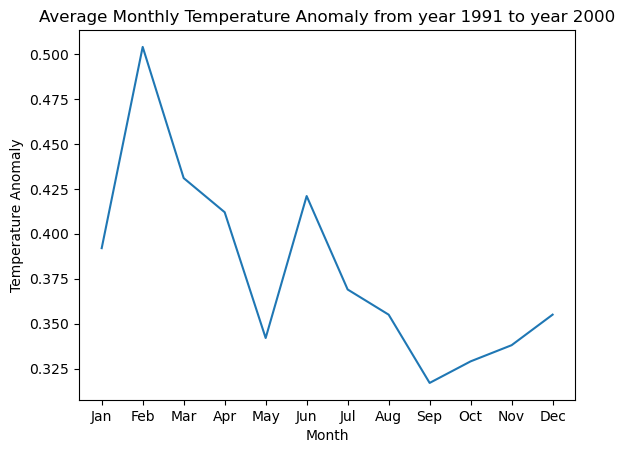

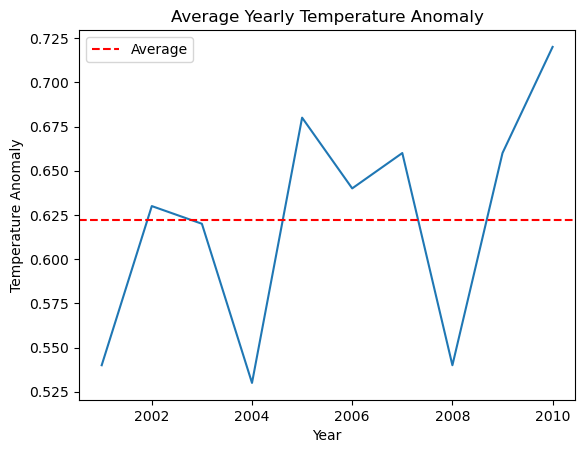

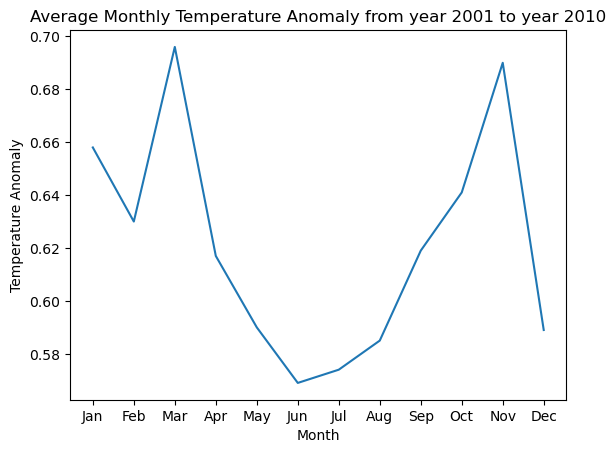

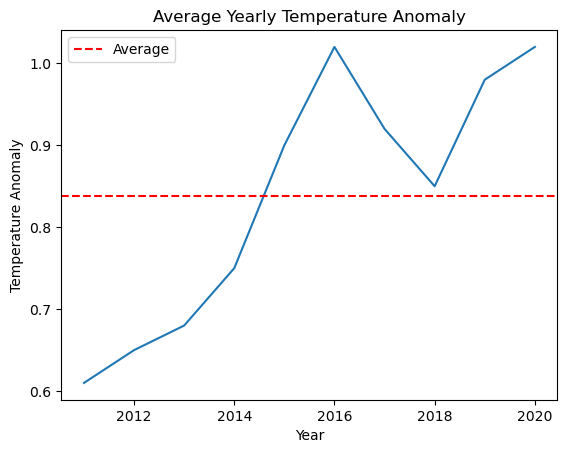

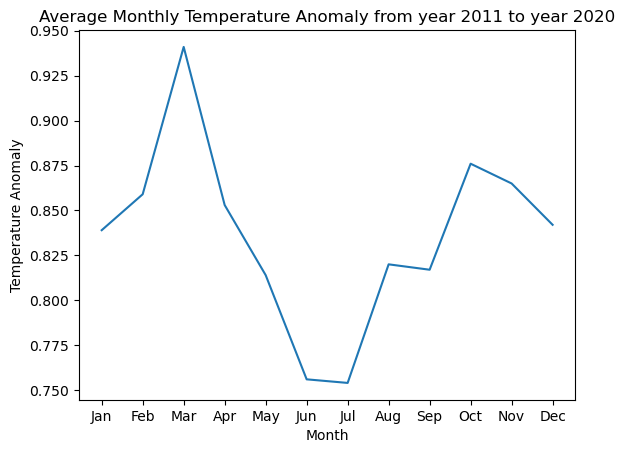

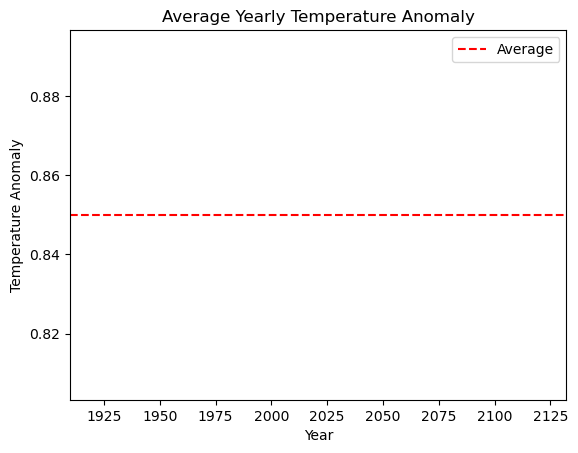

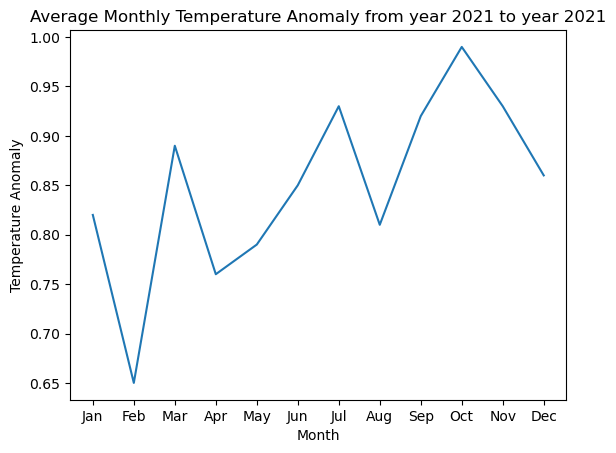

Average not calculated.
Average not calculated.


In [168]:
class ReaderObserver:
    def __init__(self, reader):
        self.reader = reader

    def update(self):
         """
        Update method called when the observed Reader has new data.
        It creates instances of AverageYear and AverageMonth, calculates and plots the averages.
        """
        # would perhaps be better to make the drawing classes themselves observers,
        # but an argument could be made that your architecture is better...
        
        cons1 = AverageYear(self.reader)
        cons2 = AverageMonth(self.reader)
        cons1.calculate_average()
        cons1.plot_average()
        cons2.calculate_average()
        cons2.plot_average()

prod = Reader(file_path, CsvConverter(file_path, header), 10)
obs = ReaderObserver(prod)
prod.add_observer(obs)
prod.start_reading()